In [1]:
import sys
sys.path.append("../")

root_path = "../data/sd_5"

In [2]:
from dgir.data import DenseGridImageDataset

ds = DenseGridImageDataset(root_path)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 90.54it/s]

[tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 8.0000e+00, 2.0000e+01],
        [0.0000e+00, 9.7752e-04, 0.0000e+00, 6.0000e+00, 8.0000e+00, 2.0000e+01],
        [0.0000e+00, 1.9550e-03, 0.0000e+00, 6.0000e+00, 8.0000e+00, 2.0000e+01],
        ...,
        [0.0000e+00, 9.9804e-01, 1.0000e+00, 1.1000e+01, 3.5000e+01, 4.7000e+01],
        [0.0000e+00, 9.9902e-01, 1.0000e+00, 1.2000e+01, 3.6000e+01, 4.8000e+01],
        [0.0000e+00, 1.0000e+00, 1.0000e+00, 1.2000e+01, 3.6000e+01, 4.6000e+01]]), tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 5.9000e+01, 7.5000e+01, 1.0900e+02],
        [1.0000e+00, 4.6318e-04, 0.0000e+00, 5.8000e+01, 7.4000e+01, 1.0800e+02],
        [1.0000e+00, 9.2635e-04, 0.0000e+00, 5.8000e+01, 7.4000e+01, 1.0800e+02],
        ...,
        [1.0000e+00, 9.9907e-01, 1.0000e+00, 1.8400e+02, 1.2800e+02, 1.1100e+02],
        [1.0000e+00, 9.9954e-01, 1.0000e+00, 1.8100e+02, 1.2800e+02, 1.1000e+02],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.8000e+02, 1.2700e+02, 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img[:3,:,:].detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

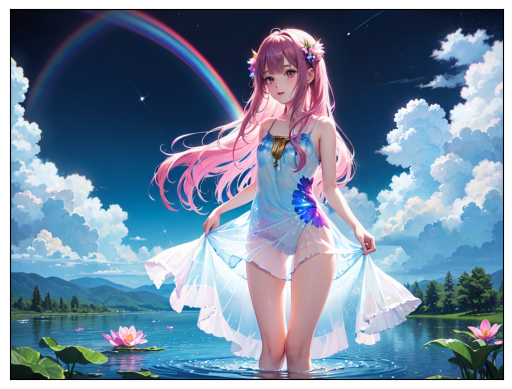

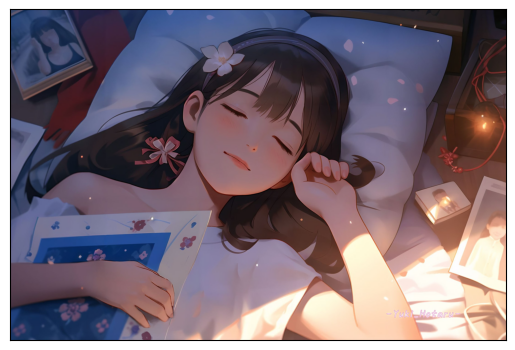

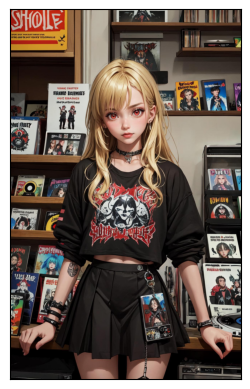

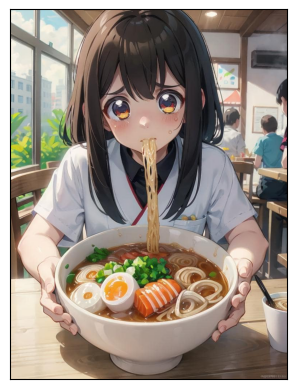

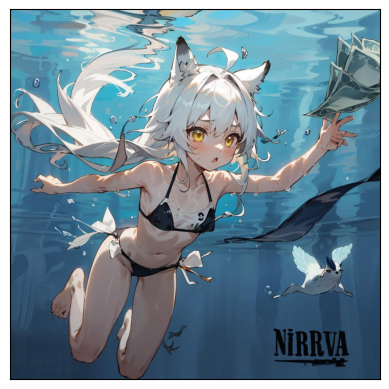

In [4]:
for im in ds.images.keys():
    show(ds.images[im]["data"])

In [5]:
len(ds)

8353280

In [6]:
ds.__getitem__(786431)

tensor([ 0.,  1.,  1., 12., 36., 46.])

In [7]:
import torch

im = ds.images[1]["data"]
grid_y = torch.linspace(0, 1, im.size(1))
grid_x = torch.linspace(0, 1, im.size(2))

In [8]:
axis_y, axis_x = torch.meshgrid(grid_y, grid_x, indexing='ij')
uv = torch.stack((axis_x, axis_y))
uv_img = torch.cat([uv, torch.zeros(1, im.size(1), im.size(2))])

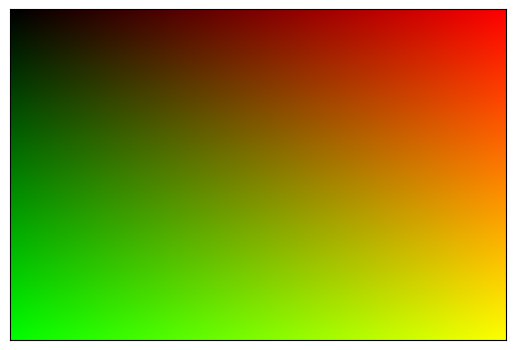

In [9]:
show(uv_img)

In [10]:
from dgir.model import DenseGridNet 

In [11]:
model = DenseGridNet([512, 512], [32, 32], 5, 2)
model.to("cuda")

DenseGridNet(
  (embeddings): ModuleList(
    (0): Embedding(263169, 2)
    (1): Embedding(154449, 2)
    (2): Embedding(74529, 2)
    (3): Embedding(23409, 2)
    (4): Embedding(1089, 2)
  )
  (mlp): MLP(
    (net): Sequential(
      (0): Linear(in_features=11, out_features=64, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=64, out_features=3, bias=True)
    )
  )
)

In [12]:
from torch.utils.data import DataLoader
dataloader = DataLoader(ds, batch_size=64, shuffle=True)

for x in dataloader:
    x = x.to("cuda")
    o = model(x)
    print(o.shape)
    break

torch.Size([64, 3])
